1. Загрузить выборку с сайта diabetes.csv.
2. Провести анализ полученной выборки используя метрики описательной статистики.
4. Проверить баланс выборки (вывести график).
5. Проовести андерсэмплинг.
6. Провести оверсемплинг.
7. Сравнить полученные результаты.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/diabetes.csv')
X=df.iloc[:,0:8]
y=df['Outcome']

In [4]:
# отбор нечисловых колонок (Категориальные признаки)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
df_non_numeric

[]


""
0
1
2
3
4
...
763
764
765
766


In [5]:
# отбор числовых колонок (Числовые признаки)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
df_numeric

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# простой случайный сэмплинг
sample_df = df.sample(100)
sample_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
621,2,92,76,20,0,24.2,1.698,28,0
227,3,162,52,38,0,37.2,0.652,24,1
711,5,126,78,27,22,29.6,0.439,40,0
209,7,184,84,33,0,35.5,0.355,41,1
374,2,122,52,43,158,36.2,0.816,28,0
...,...,...,...,...,...,...,...,...,...
573,2,98,60,17,120,34.7,0.198,22,0
697,0,99,0,0,0,25.0,0.253,22,0
463,5,88,78,30,0,27.6,0.258,37,0
516,9,145,88,34,165,30.3,0.771,53,1


Class 0: 500
Class 1: 268
Пропорция: 1.87 : 1


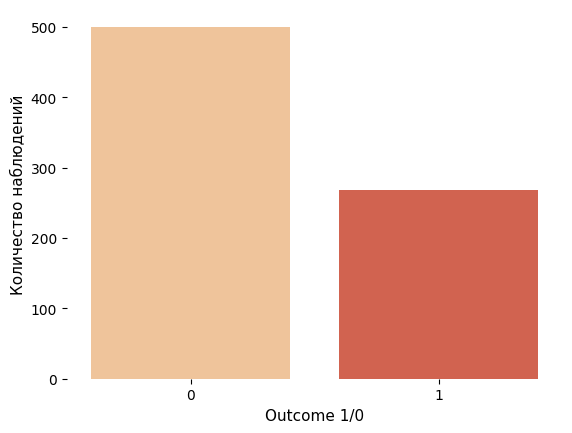

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка баланса выходной переменной
target_count = df.Outcome.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Пропорция:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(x='Outcome', data= df, palette="OrRd")
plt.box(False)
plt.xlabel('Outcome 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

1    268
0    250
Name: Outcome, dtype: int64


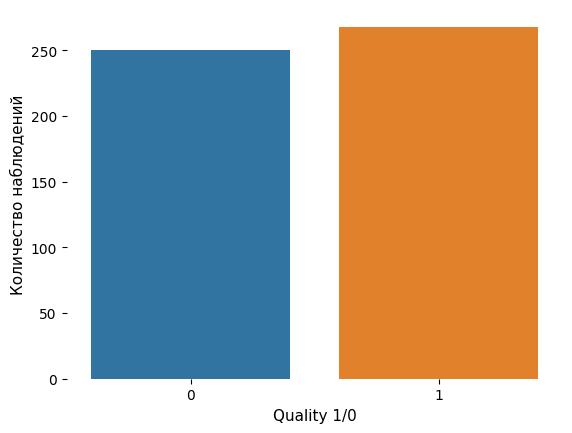

In [18]:
# перемешаем датафрейм
shuffled_df = df.sample(frac=1, random_state=4)

# Поместите весь класс 1 в отдельный набор данных.
CHD_df = shuffled_df.loc[shuffled_df['Outcome'] == 1]

#Произвольно выберем 492 наблюдения из класса 0 (класс большинства)
none_CHD_df = shuffled_df.loc[shuffled_df['Outcome'] == 0].sample(n=250, random_state=42)

# Снова объедините оба фрейма данных
normalize_df = pd.concat([CHD_df, none_CHD_df])

# проверить количество новых классов
target_count2 = normalize_df.Outcome.value_counts()
print(target_count2)
sns.countplot(data=normalize_df, x='Outcome')
plt.box(False)
plt.xlabel('Quality 1/0', fontsize=11)
plt.ylabel('Количество наблюдений', fontsize=11)
plt.show()

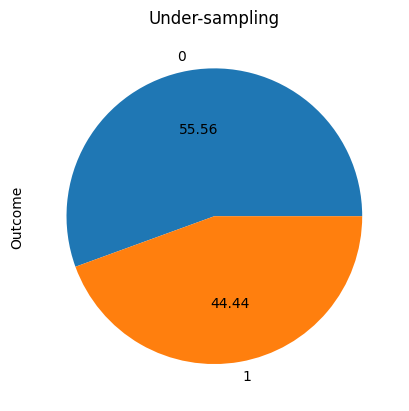

In [19]:
# андерсэмплинг
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
autopct = "%.2f"
ax = y_res.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Under-sampling")

(1000, 8)
(768, 8)


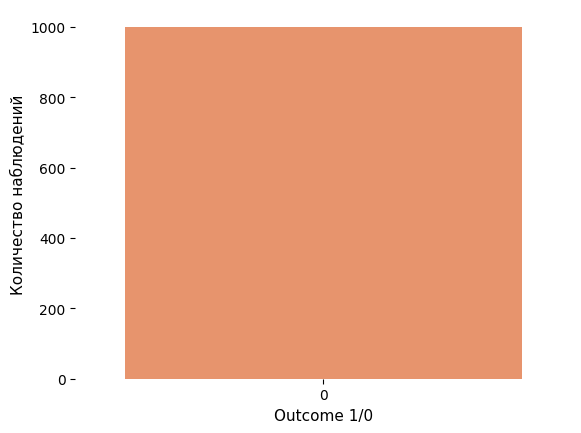

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape

sns.countplot(df_new_sm.Outcome, palette="OrRd")
plt.box(False)
plt.xlabel('Outcome 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

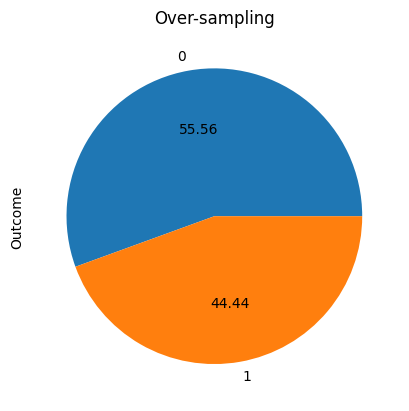

In [24]:
# оверсемплинг
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
ax = y_s.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")

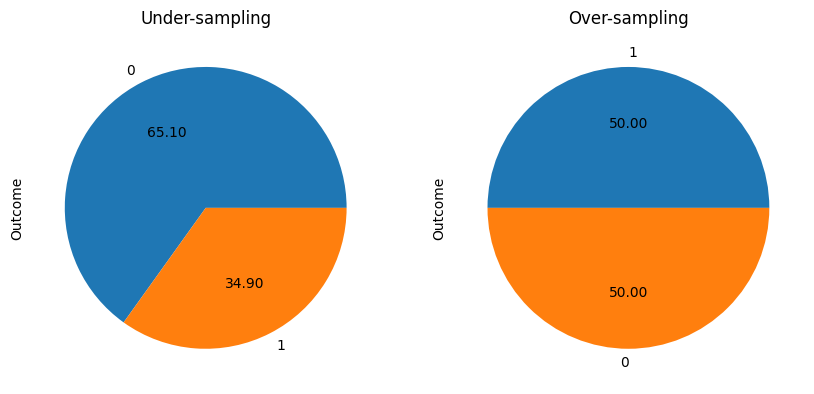

In [26]:
# сравнение
sampling_strategy = "not minority"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Under-sampling")

sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
y_s.value_counts().plot.pie(autopct=autopct, ax=axs[1])
_ = axs[1].set_title("Over-sampling")